### Time Series Analysis | SARIMA (Seasonal Autoregressive Integrated Moving Average)
----------------------------------------------------------------------------------------
SARIMA is one another important model used for time series forecasting. It overcomes the limitations of ARIMA


##### Introduction To SARIMA
The ARIMA model has the limitation that it does not work with seasonal components in time series. This means that to apply the ARIMA model, the series data should be free from seasonal components, i.e., the repeated cycles. For this purpose, it needs additional preprocessing to adjust the seasonality. 

To overcome this, the Seasonal Autoregressive Integrated Moving Average (SARIMA) model is used which is an extension of the ARIMA. This method supports the univariate time series data with seasonal components. To support this, it applies more parameters in addition to the parameters required by the ARIMA model.

This method models the next step in the sequence as a linear function of the differenced observations, errors, different seasonal observations, and seasonal errors at prior time steps. It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modelling at the seasonal level.



##### How Does SARIMA Work?
--------------------------------------------
###### Working Principle Of SARIMA
As we discussed in the previous course, ARIMA(p, d, q) uses the three parameters p, d and q to specify the autoregression, order of differencing and moving average window respectively. The SARIMA uses 6 parameters to define the forecasting model. The following parameters are used to specify the trend orders where:

* p: The trend autoregressive order
* d: The trend order of differencing
* q: The trend moving average lags

The additional three parameters used address the seasonal component:

* P: The seasonal autoregressive order
* D: The seasonal order of differencing
* Q: The seasonal moving average lags

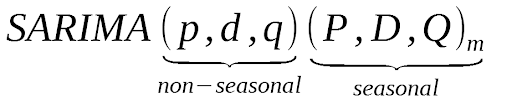
Overall, the SARIMA model looks like as shown above where the m indicates the number of observations per year. For example, m equal to 12 for monthly data indicates a yearly seasonal cycle. 

While building the SARIMA model for time series forecasting, the major task is to find the values of parameters similar to how we found in the case of ARIMA. This process will become more clear when we discuss the implementation of SARIMA in the next section. 

### Sales Forecasting Using SARIMA
------------------------------------------------------------------------------------
So far now we have discussed SARIMA which is an extension of the ARIMA model with the seasonal components. The SARIMA mostly applied to seasonal time series. If there is seasonality visible in the dataset then it is a better model given series using SARIMA (Seasonal ARIMA). In the ARIMA model, we are not using any seasonal information, only using part of the series which definitely results in poor predictions.   

The SARIMA model addition to ARIMA includes seasonal parameters where we have to specify the seasonality of data. We think of it as two separate ARIMA models, one dealing with non-seasonal data and one dealing with seasonal data. 

So in this section, our task is to model given seasonal time series data using SARIMA, for that we are using a dataset for a famous chair manufacturing company. The dataset holds the information on monthly sales for 10 years. 

######  The following steps are to be taken to model this time series using SARIMA.

###### Step 1: Load and read the data

The dataset is stored in a CSV file to load. We will first import the Pandas library and will load the data into the system.

In [1]:
# Importing Reuired Library
import pandas as pd

In [21]:
# load the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/monthly_sales.csv')

In [22]:
# top 5 rows
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [26]:
# shape of data
data.shape

(105, 2)

In [29]:
# correct the date format
data['Month'] = pd.to_datetime(data.Month)

Now we will set the index as the Date column so we can access the series based on dates.

In [30]:
# change the index
data.set_index('Month',inplace=True)

###### Step 2: Checking the stationarity of Series

Stationarity means that there should not be any trend component in the series, this can be checked by observing the series pictorially or using a statistical test. First, we will check pictorially.

<AxesSubplot:xlabel='Month'>

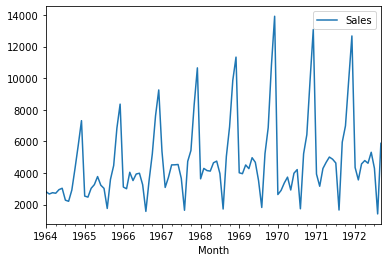

In [31]:
# check how series looks like
data.plot()

By looking at the series we can say it has a seasonal component, for clarity let’s check it by ADfuller test. The Augmented Dickey-Fuller test is used to measure the stationarity of the series which aims to reject the null hypothesis that the given series is non-stationary. Basically, it calculates the p-value and compares it with a standard threshold value which is 0.05, if the p-value is less than it then the data is stationary. 

In [32]:
# Statistical way of testing the stationarity
from statsmodels.tsa.stattools import adfuller

# checking the stationarity
result = adfuller(data['Sales'])
print('No differentiation: \n P-Value',result[1])

result = adfuller(data['Sales'].diff().dropna())
print('1st differentiation: \n P-Value',result[1])

result = adfuller(data['Sales'].diff().diff().dropna())
print('2nd differentiation: \n P-Value',result[1])

No differentiation: 
 P-Value 0.36391577166024713
1st differentiation: 
 P-Value 2.519620447387365e-10
2nd differentiation: 
 P-Value 3.6434347766472844e-12


As we can see that the original series is non-stationary as the p-value is greater than 0.05, later the p-value for 1st and 2nd differentiation is smaller than a threshold value. 

If the series has positive autocorrelations out to a high number of lags, then it probably needs a higher order of differencing. The optimal order of differencing is often the order of differencing at which the standard deviation is lowest. So we will choose 1st differentiation for further analysis. 

In [33]:
# Using 1st order differentiation
data['Stationary'] = data['Sales'].diff()

Now let’s compare both series that are stationary and noon-stationary. 

<AxesSubplot:xlabel='Month'>

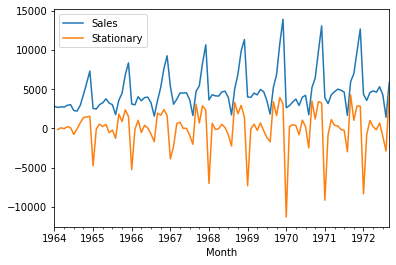

In [34]:
# take a look at original series and stationary series
data.plot()

Above we can see what the stationary series looks like.

###### Step 3: Calculating parameters required for SARIMA

As we discussed in the theoretical section the SARIMA model assumes certain objectives to satisfy those we have to calculate the p: order of the autoregressive model, d: order of differentiation, and q: is the lagged error and additional a Seasonal component S which determined by considering a repetition period. 

We already know the d value which is 1, next to calculate p and q we will plot the Autocorrelation and Partial Autocorrelation plot as below.

C:\Users\divak\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


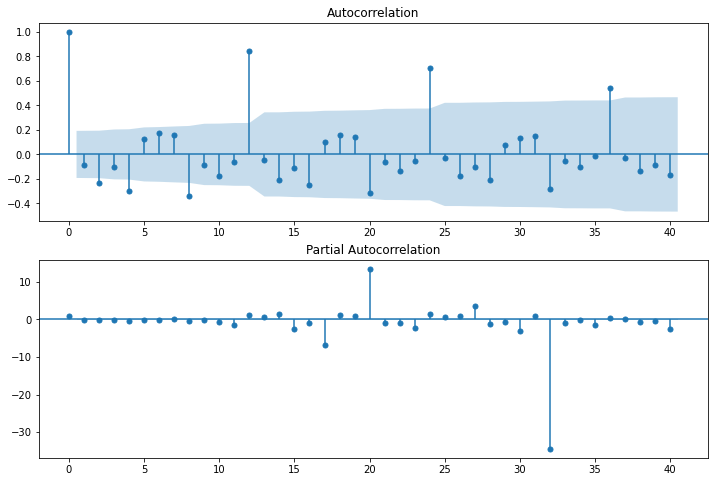

In [35]:
# import acf and pacf plots to calculate p,d,q values
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Stationary'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Stationary'].dropna(),lags=40,ax=ax2)

From the above ACF plot, we can choose p by observing the most significant lag and its 1st lag. And q to be 1 is calculated based on the number of lags crossing the threshold limits.

* Thus we have p = 1, d=1, q=1, seasonal_component=12

###### Step 4: Build the SARIMA model

Now that we have identified the orders of parameters that need to be added while initializing the ARIMA model, below we will initialize the model. First, we will import SARIMAX from the statsmodels library and initialize it and will train by using the .fit method on the original time series, not the differentiated one. 

In [36]:
# Import arima model
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Initialize and train
srm = SARIMAX(data.Sales.dropna(), order=(1,1,1), seasonal_order=(1,1,1,12))
model = srm.fit()

C:\Users\divak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\divak\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


After successfully training the model, let’s take a look at the summary of the result.

In [38]:
# Summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Sat, 28 May 2022   AIC                           1486.804
Time:                                    20:48:41   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In this section first, we will forecast the series on existing data starting from index 90 to 200 and plot it to showcase trends.

<AxesSubplot:xlabel='Month'>

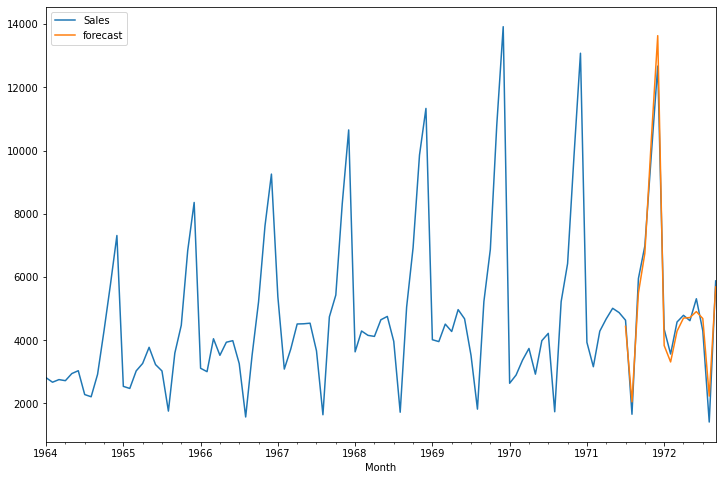

In [40]:
data['forecast']=model.predict(start=90,end=200,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))

Now finally we will forecast the next 10 months of data.

In [41]:
# forecasting next 10 months values
model.forecast(10)

1972-10-01     7023.698958
1972-11-01     9996.175696
1972-12-01    12891.997850
1973-01-01     4561.379909
1973-02-01     3718.694920
1973-03-01     4792.240264
1973-04-01     5034.490211
1973-05-01     5047.836550
1973-06-01     5488.453268
1973-07-01     4593.507603
Freq: MS, Name: predicted_mean, dtype: float64

So this is how we can address the time series forecasting problem for seasonal data using the SARIMA model.


------------------------------------------------------------------------------------